# Linear Regression Training
## Boston house-prices dataset
* 506 examples
* 13 features
* the features are real and positive
* the targets are real in the range of 5 to 50

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [171]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [172]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [173]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

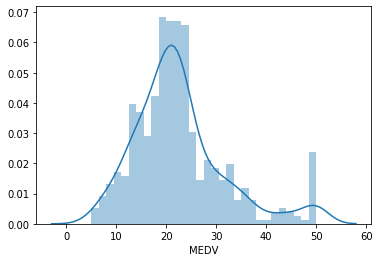

In [174]:
sns.distplot(df['MEDV'], bins=30)
plt.show()

## 1. Fit a linear regression model to predict medv using LSTAT
### Do it in 3 different ways: analytically, sequantial learning and sklearn's builtin predictor.
### Compare your results

## Analytical Solution
$y' = wx$

$loss(y,y')=\frac{1}{n} \sum_{i=1}^{n}{(y'-y)^2} = \frac{1}{n} \sum_{i=1}^{n}{(wx-y)^2}$ (MSE loss)

$loss'(y,y')$  respect to $w$ is $\frac{2}{n} \sum_{i=1}^{n} {(wx-y)} \cdot{x}$

that is $\sum_{i=1}^{n}{x_i^2} \cdot w  = \sum_{i=1}^{n} {y_i \cdot x_i}$

notice that in general $x_i$ is a feature vector and $y_i$ is an entry in the target vector, but here we use only one
 feature, so the solution is easy:

$w = \sum_{i=1}^{n}{y_i} / \sum_{i=1}^{n}{x_i}$

In [200]:
X = df['LSTAT']
Y = df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=1 / 3, random_state=0)

X_a = np.array([[1,x] for x in X_train])

n = X_a.shape[1]
r = np.linalg.matrix_rank(X_a)

U, sigma, VT = np.linalg.svd(X_a, full_matrices=False)

D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

V = VT.T

X_plus = V.dot(D_plus).dot(U.T)

w_a = X_plus.dot(Y_train)

In [201]:
def pred_a(x):
    return np.dot(w_a,np.array([1,x]))

In [215]:
preds_a = X_test.apply(pred_a)

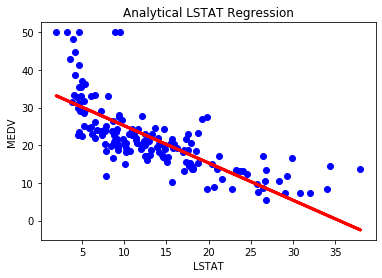

In [203]:
plt.title('Analytical LSTAT Regression')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, preds_a, color='red', linewidth=3)

plt.show()

In [204]:
w_s = 0
b_s = 0
lr = 0.005
epochs = 10
n = len(X_train)

for i in range(epochs):
    Y_pred = w_s*X_train + b_s
    grad_w = (-2/n) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    grad_b = (-2/n) * sum(Y_train - Y_pred)  # Derivative wrt c
    w_s = w_s - lr * grad_w
    b_s = b_s - lr * grad_b

In [205]:
def pred_s(x):
    return w_s*x + b_s

In [208]:
preds_seq = X_test.apply(pred_s)

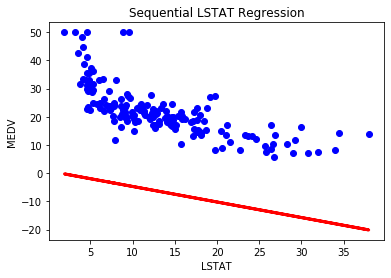

In [207]:
plt.title('Sequential LSTAT Regression')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, preds_seq, color='red', linewidth=3)

plt.show()

In [212]:
from sklearn.linear_model import LinearRegression

X_train_sk = [[x] for x in X_train]
X_test_sk = [[x] for x in X_test]

model = LinearRegression()
model.fit(X_train_sk,Y_train)
preds_sk = model.predict(X_test_sk)

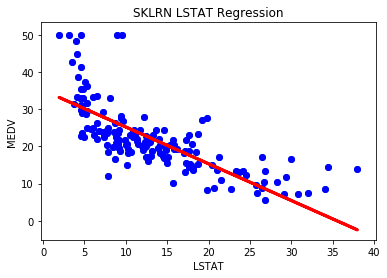

In [213]:
plt.title('SKLRN LSTAT Regression')
plt.scatter(X_test,Y_test)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, preds_sk, color='red', linewidth=3)

plt.show()

In [216]:
print('MSE using analytical solution: %.2f'
      % mean_squared_error(preds_a, Y_test))

print('MSE using sequential solution: %.2f'
      % mean_squared_error(preds_seq, Y_test))

print('MSE using sklearn: %.2f'
      % mean_squared_error(preds_sk, Y_test))

MSE using analytical solution: 38.66
MSE using sequential solution: 851.68
MSE using sklearn: 38.66


### Sklearn is similar to Analytical

## 2. Use another feature that is equal to two times lstat

In [185]:
X = [[x, 2*x] for x in df['LSTAT']]

model = LinearRegression()
model.fit(X,df['MEDV'])
preds = model.predict(X)

df['SK2_PRED'] = preds
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,A_PRED,SEQ_PRED,SK_PRED,SK2_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,29.822595,-10.934938,29.822595,29.822595
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.870390,-20.639761,25.870390,25.870390
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.725142,-8.718692,30.725142,30.725142
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.760696,-6.175841,31.760696,31.760696
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,29.490078,-11.751449,29.490078,29.490078


### We get the same results. The second feature doesn't add any knowledge.

## 3. Use all features except age. Did your prediction became better?

In [186]:
col_names = list(df.columns)
col_names.remove('AGE')
col_names.remove('MEDV')

X = df[col_names]

model = LinearRegression()
model.fit(X,df['MEDV'])
preds = model.predict(X)

df['NO_AGE_PRED'] = preds
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,A_PRED,SEQ_PRED,SK_PRED,SK2_PRED,NO_AGE_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,29.822595,-10.934938,29.822595,29.822595,29.998228
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.870390,-20.639761,25.870390,25.870390,25.009542
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.725142,-8.718692,30.725142,30.725142,30.562689
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.760696,-6.175841,31.760696,31.760696,28.607066
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,29.490078,-11.751449,29.490078,29.490078,27.940601


In [187]:
print('MSE using LSTAT: %.2f'
      % mean_squared_error(df['SK_PRED'], df['MEDV']))

print('MSE using all except AGE: %.2f'
      % mean_squared_error(df['NO_AGE_PRED'], df['MEDV']))

MSE using LSTAT: 38.48
MSE using all except AGE: 21.89


### Predictions are much better

## 4. Compute parabolic fit based on LSTAT. Did your prediction became better?

In [188]:
from sklearn.preprocessing import PolynomialFeatures

In [189]:
Y = df['MEDV']
X = [[x] for x in df['LSTAT']]

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

model = LinearRegression()
model.fit(X, Y)

preds = model.predict(X)

df['POLY_LSTAT_PRED'] = preds
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,A_PRED,SEQ_PRED,SK_PRED,SK2_PRED,NO_AGE_PRED,POLY_LSTAT_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,29.822595,-10.934938,29.822595,29.822595,29.998228,32.324539
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.870390,-20.639761,25.870390,25.870390,25.009542,25.177912
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,30.725142,-8.718692,30.725142,30.725142,30.562689,34.167979
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,31.760696,-6.175841,31.760696,31.760696,28.607066,36.379915
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,29.490078,-11.751449,29.490078,29.490078,27.940601,31.665190


In [190]:
print('MSE using LSTAT: %.2f'
      % mean_squared_error(df['SK_PRED'], df['MEDV']))

print('MSE using Poly LSTAT: %.2f'
      % mean_squared_error(df['POLY_LSTAT_PRED'], df['MEDV']))

MSE using LSTAT: 38.48
MSE using Poly LSTAT: 30.33


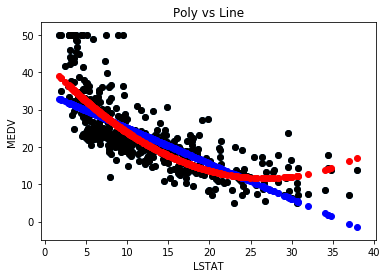

In [191]:
plt.title('Poly vs Line')
plt.scatter(df['LSTAT'],df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.scatter(df['LSTAT'], df['MEDV'],  color='black')
plt.scatter(df['LSTAT'], df['SK_PRED'],  color='blue')
plt.scatter(df['LSTAT'], df['POLY_LSTAT_PRED'],  color='red')

plt.show()

### Predictions are much better

## 5. Create polynomial regression of higher order with regularization (l1, l2)

In [192]:
# lasso is l1 and ridge is l2
from sklearn.linear_model import Ridge, Lasso

In [193]:
Y = df['MEDV']
X = [[x] for x in df['LSTAT']]

poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(X)

model = Lasso(alpha=0.1)
model.fit(X, Y)

preds = model.predict(X)

df['l1_LSTAT_PRED'] = preds
df.head()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7465.851807443669, tolerance: 4.2716295415019765
  positive)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B,LSTAT,MEDV,A_PRED,SEQ_PRED,SK_PRED,SK2_PRED,NO_AGE_PRED,POLY_LSTAT_PRED,l1_LSTAT_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,396.90,4.98,24.0,29.822595,-10.934938,29.822595,29.822595,29.998228,32.324539,32.558208
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,396.90,9.14,21.6,25.870390,-20.639761,25.870390,25.870390,25.009542,25.177912,24.432652
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,392.83,4.03,34.7,30.725142,-8.718692,30.725142,30.725142,30.562689,34.167979,34.904362
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,394.63,2.94,33.4,31.760696,-6.175841,31.760696,31.760696,28.607066,36.379915,37.846362
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,396.90,5.33,36.2,29.490078,-11.751449,29.490078,29.490078,27.940601,31.665190,31.743070


In [194]:
Y = df['MEDV']
X = [[x] for x in df['LSTAT']]

poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(X)

model = Ridge(alpha=0.1)
model.fit(X, Y)

preds = model.predict(X)

df['l2_LSTAT_PRED'] = preds
df.head()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.20816e-18): result may not be accurate.
  overwrite_a=True).T


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,MEDV,A_PRED,SEQ_PRED,SK_PRED,SK2_PRED,NO_AGE_PRED,POLY_LSTAT_PRED,l1_LSTAT_PRED,l2_LSTAT_PRED
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,4.98,24.0,29.822595,-10.934938,29.822595,29.822595,29.998228,32.324539,32.558208,32.137158
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,9.14,21.6,25.870390,-20.639761,25.870390,25.870390,25.009542,25.177912,24.432652,23.314481
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,4.03,34.7,30.725142,-8.718692,30.725142,30.725142,30.562689,34.167979,34.904362,36.007906
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,2.94,33.4,31.760696,-6.175841,31.760696,31.760696,28.607066,36.379915,37.846362,41.797271
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,5.33,36.2,29.490078,-11.751449,29.490078,29.490078,27.940601,31.665190,31.743070,30.942390


In [195]:
print('MSE using poly l1: %.2f'
      % mean_squared_error(df['l1_LSTAT_PRED'], df['MEDV']))

print('MSE using Poly l2: %.2f'
      % mean_squared_error(df['l2_LSTAT_PRED'], df['MEDV']))

MSE using poly l1: 28.78
MSE using Poly l2: 26.87


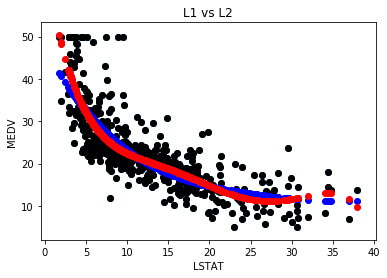

In [196]:
plt.title('L1 vs L2')
plt.scatter(df['LSTAT'],df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

plt.scatter(df['LSTAT'], df['MEDV'],  color='black')
plt.scatter(df['LSTAT'], df['l1_LSTAT_PRED'],  color='blue')
plt.scatter(df['LSTAT'], df['l2_LSTAT_PRED'],  color='red')

plt.show()
